# Tutorial. Numerical methods for ordinary differential equations

A general technique for solving problems with partial differential equations (PDE) that involve a time variable $t$ and one or more space variables is the so-called [method of lines](https://en.wikipedia.org/wiki/Method_of_lines). It proceeds by first discretising the partial derivatives with respect to the space variables and leaving the time variable continuous, leadind to an approximating system of ordinary differential equations (ODE) in the variable $t$. The Cauchy problem for the resulting ordinary differential equations is then solved using a standard method for the task.

The convenience and versatility of readily available ordinary differential equation solvers permits complicated partial differential equations to be solved with comparative ease in this manner, especially when there is only one space variable. Note that it might well be more efficient to solve a given partial differential equation by a method particularly suited to the equation, but the easy solution of rather general problems with acceptable accuracy makes the approach of the method of lines attractive.

In the present notebook, we are interested in reviewing some of the most basic numerical methods to solve Cauchy problems for an ordinary differential equation of the form:
$$
\begin{cases}
u'(t)=f(t,u(t)),\ t>0,\\
u(0) = u_0,
\end{cases}
$$
where $u$ is a function typically taking its values in $\mathbb{R}^d$ (in the method of lines, the integer $d$ is the dimension of the semi-discretised partial differential equation problem).

For this notebook, we will need the <tt>numpy</tt> and <tt>matplotlib</tt> packages.

In [2]:
import numpy as np

# To draw matplotlib plots within this notebook.
%matplotlib inline
import matplotlib.pyplot as plt

## Exercise 1. The SIR model.
Consider the system of the Kermack-McKendrick [SIR model](http://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model), describing the evolution of a population affected by an infectious disease
$$
\left\{
\begin{align*}
S'(t)&=-r\,S(t)I(t),\\
I'(t)&=r\,S(t)I(t)-a\,I(t),\\
R'(t)&=a\,I(t),
\end{align*}
\right.\ t>0,
$$
associated with the initial data
$$
S(0)=S_0,\ I(0)=I_0,\ R(0)=R_0.
$$
The functions $S$, $I$, and $R$ represent the numbers of people respectively susceptible to the disease, infected by the disease, and immune after being infected over time, the real number $r$ is the infection rate, and the real number $a$ is the rate of recovery. We will use the following values for the problem parameters:

$$
S_0=762,\ I_0=1,\ R_0=0,\ r=0.00218,\ a=0.44036,\ T=14,
$$

obtained by calibrating the model using data from an influenza epidemic in a boys' school published in the British medical journal *The Lancet* on March 4, 1978.

**Question.** Compute an approximate solution of the system on the time interval $[0,T]$ using the [explicit (or forward) Euler method](https://en.wikipedia.org/wiki/Euler_method) and $N=10^5$ discretisation steps. To do this, write an independent function `explicit_euler` implementing the method (it will be used in other exercises), whose inputs are the function $f$ in the right-hand side of the ODE, the initial and final values of the time variable, the initial datum of the problem, the number of steps used for the uniform discretisation grid, and whose outputs are two arrays containing respectively the values of the times at which the approximation of the solution is computed and the corresponding values of this approximation. Represent the time evolution of the values of the approximations obtained for the numbers $S(t)$, $I(t)$ and $R(t)$.

In [3]:
def explicit_euler(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=np.linspace(ti,tf,N+1),[]
    u.append(u0)
    for n in range(N):
        u.append(u[n]+h*f(t[n],u[n]))
    return t,u

[array([762.,   1.,   0.]),
 array([7.61999767e+02, 1.00017091e+00, 6.16504000e-05]),
 array([7.61999535e+02, 1.00034185e+00, 1.23311337e-04]),
 array([7.61999302e+02, 1.00051282e+00, 1.84982812e-04]),
 array([7.61999070e+02, 1.00068382e+00, 2.46664828e-04]),
 array([7.61998837e+02, 1.00085485e+00, 3.08357386e-04]),
 array([7.61998604e+02, 1.00102591e+00, 3.70060488e-04]),
 array([7.61998371e+02, 1.00119700e+00, 4.31774136e-04]),
 array([7.61998138e+02, 1.00136811e+00, 4.93498331e-04]),
 array([7.61997906e+02, 1.00153926e+00, 5.55233075e-04]),
 array([7.61997673e+02, 1.00171043e+00, 6.16978371e-04]),
 array([7.61997440e+02, 1.00188164e+00, 6.78734220e-04]),
 array([7.61997207e+02, 1.00205287e+00, 7.40500624e-04]),
 array([7.61996974e+02, 1.00222413e+00, 8.02277584e-04]),
 array([7.61996741e+02, 1.00239542e+00, 8.64065102e-04]),
 array([7.61996507e+02, 1.00256674e+00, 9.25863181e-04]),
 array([7.61996274e+02, 1.00273809e+00, 9.87671822e-04]),
 array([7.61996041e+02, 1.00290947e+00, 1.04

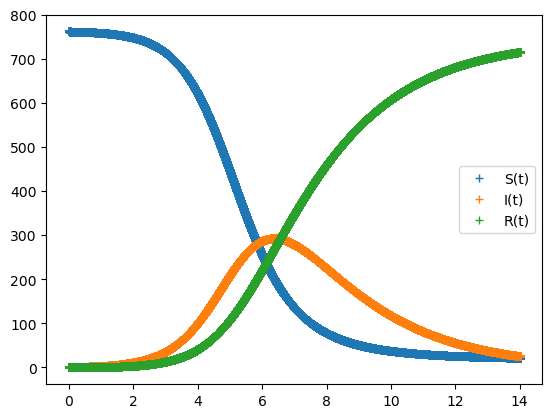

In [4]:
r,a=0.00218,0.44036
def f(t,u): return np.array([-r*u[0]*u[1],r*u[0]*u[1]-a*u[1],a*u[1]])
u0=np.array([762.,1.,0])
t,u=explicit_euler(f,0.,14.,u0,10**5)
[p1,p2,p3]=plt.plot(t,u,'+')
plt.legend([p1,p2,p3],["S(t)","I(t)","R(t)"])
u

**Answer.** It is observed that the epidemic peak is reached on the seventh day.

**Question.** Let $N$ denote the number of discretisation steps used. Check theoretically and numerically that the obtained approximation verifies, for all $0\leq n\leq N$,
$$
S_n+I_n+R_n=S_0+I_0+R_0.
$$

**Answer.** Summing the equations of the system of the SIR model, we get
$$
S'(t)+I'(t)+R'(t)=0, t>0,
$$
from which we deduce that the sum $S(t)+I(t)+R(t)$ is constant as a function of time and therefore equal to $S_0+I_0+R_0$. We verify that this is also the case in the numerical simulation of the problem by superimposing to the previous graphs the graph of the evolution of the quantity $S(t)+I(t)+R(t)$ as a function of time.

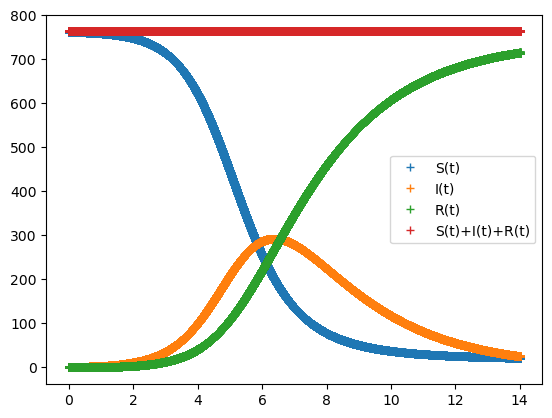

In [5]:
[p1,p2,p3,p4]=plt.plot(t,u,'+',t,np.sum(u,1),'+')
plt.legend([p1,p2,p3,p4],["S(t)","I(t)","R(t)","S(t)+I(t)+R(t)"])

There is conservation of the quantity by the numerical scheme.

**Question.** Taking as reference solution the one obtained with $N=10^5$ discretisation steps, represent (using a logarithmic scale) the errors at time $T$ found using successively $N=10,10^2,\dots,10^4$ discretisation steps and determine the effective order of convergence of the method using the ``polyfit`` function from <tt>numpy</tt>.

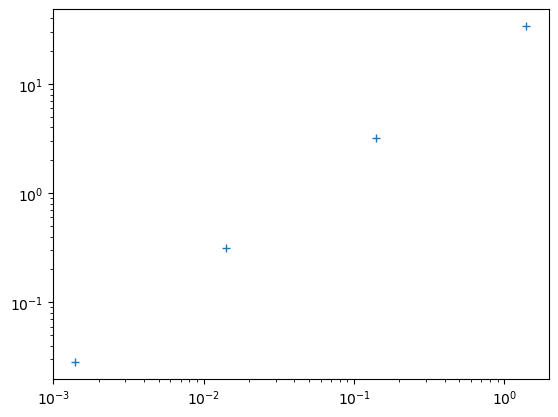

In [6]:
t,u=explicit_euler(f,0.,14.,u0,10**5)
uref,err,h=u[-1],[],[]
for i in range(4) :
    N=10**(i+1)
    h.append(14/N)
    t,u=explicit_euler(f,0.,14.,u0,N)
    err.append(np.linalg.norm(uref-u[-1]))
plt.loglog(h,err,'+')

**Answer.** To determine the order of the method, we must return to the definition of this notion. The global error of a method of order $p$, with $p$ an integer, decreases with the discretisation step $h$ as $O(h^p)$ and we have therefore, for $h$ sufficiently small,
$$
\text{error at time $T$}\approx C\,h^p,
$$
with $C$ a constant. Taking the logarithm of this relation, we get
$$
\ln(\text{error at time $T$})\approx p\,\ln(h)+ln(C).
$$
It is therefore sufficient, from the values of the approximate error obtained with the different choices of time steps, to determine the slope of the line obtained by a linear regression using the ``polyfit`` function. 

The effective order of convergence is 1.0241140156673951


array([1.02411402, 3.18770068])

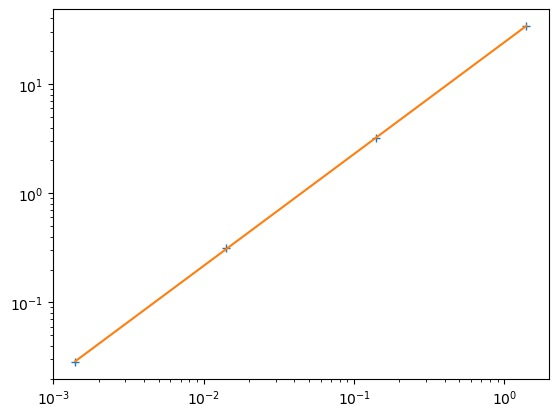

In [7]:
slope=np.polyfit(np.log(h),np.log(err),1)
plt.loglog(h,err,'+',h,np.exp(slope[1])*(h**(slope[0])))
print("The effective order of convergence is",slope[0])
slope

The computed value of the slope is close to the theoretical order of the method.

**Question.** Write, on the model of the `explicit_euler` function, a function named `rk4` for the ["classic" Runge-Kutta method of order four](https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method). The Butcher tableau of the method is
$$
\begin{array}{c|cccc}
0\\
\frac{1}{2}&\frac{1}{2}\\
\frac{1}{2}&0&\frac{1}{2}\\
1&0&0&1\\
\hline
&\frac{1}{6}&\frac{1}{3}&\frac{1}{3}&\frac{1}{6}
\end{array}.
$$
Determine the effective order of this method by proceeding as in the previous question.

In [8]:
def rk4(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=np.linspace(ti,tf,N+1),[]
    u.append(u0)
    for n in range(N):
        k1=f(t[n],u[n])
        k2=f(t[n]+0.5*h,u[n]+0.5*h*k1)
        k3=f(t[n]+0.5*h,u[n]+0.5*h*k2)
        k4=f(t[n]+h,u[n]+h*k3)
        u.append(u[n]+h*(k1+2.*(k2+k3)+k4)/6.)
    return t,u

The effective order of convergence is 3.785610357203496


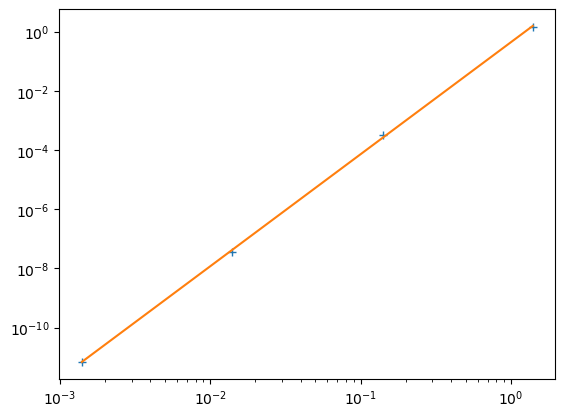

In [9]:
t,u=rk4(f,0.,14.,u0,10**5)
uref,err,h=u[-1],[],[]
for i in range(4):
    N=10**(i+1)
    h.append(14/N)
    t,u=rk4(f,0.,14.,u0,N)
    err.append(np.linalg.norm(uref-u[-1]))
slope=np.polyfit(np.log(h),np.log(err),1)
plt.loglog(h,err,'+',h,np.exp(slope[1])*(h**(slope[0])))
print("The effective order of convergence is",slope[0])

**Answer.** The computed value of the slope is once again close to the theoretical order of the method.

## Exercise 2. The Dahlquist test equation.

The goal of this exercise is to use several one-step methods to numerically solve a problem based on the Dahlquist test equation, that is the following autonomous differential equation:
$$
u'(t)=\alpha u(t),\ t>0,
$$
where $u$ takes its values in $\mathbb{C}$ and $\alpha$ belongs to $\mathbb{C}$, completed by the initial condition
$$
u(0) = 1,
$$
up to a given final time $T$. The unique solution of this Cauchy problem possesses a closed-form expression, given by
$$
u(t) = e^{\alpha t}.
$$
When $\text{Re}(\alpha)<0$, this problem is at the basis of the notion of [A-stability](https://en.wikipedia.org/wiki/Stiff_equation#A-stability) for the behaviour of methods applied to the numerical solution of [stiff equations](https://en.wikipedia.org/wiki/Stiff_equation).

In what follows, we denote by $N$ the number of steps in the uniform grid discretising the interval $[0,T]$ and by $\Delta t=\frac{T}{N}$ the length of a step. We will denote by $u^{(n)}_{\text{*}}$ the numerical approximation of the exact value $u(n \Delta t)$,  where the character * refers to the selected method.

The chosen values of the parameters are $T=10$ and $N=100$.

In [10]:
T=10.
N=100

**Question.** Using each of the following methods, numerically solve the Cauchy problem and plot both the numerical solution and the exact solution for several (both positive and negative) real values of $\alpha$. Are some numerical instabilities observed?

**a. The explicit Euler method.** For this method, use the function written in the previous exercise.

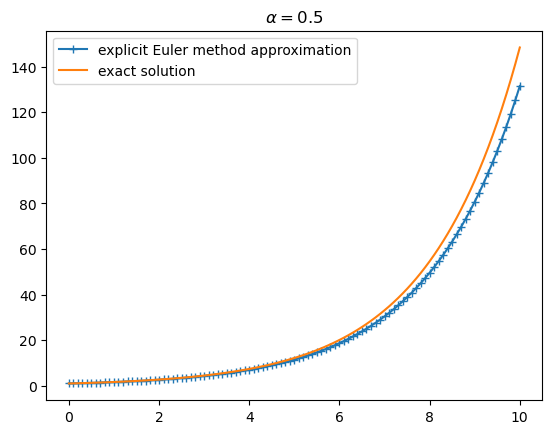

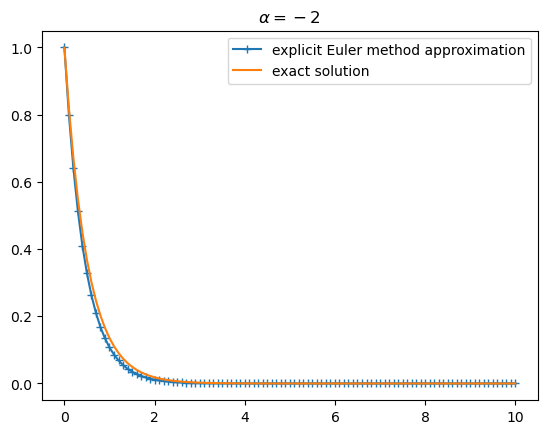

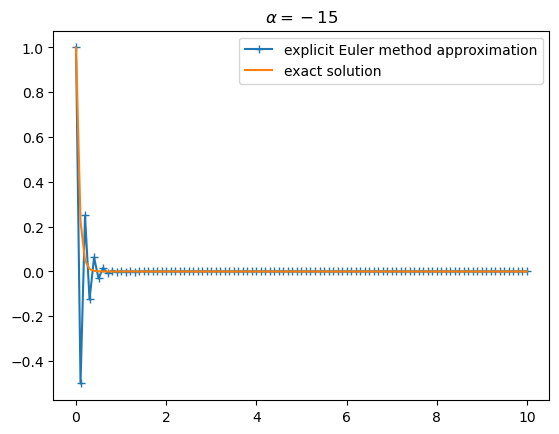

In [11]:
def f(t,u): return alpha*u

u0=np.array([1.])

alpha=0.5
t,u_EE=explicit_euler(f,0.,T,u0,N)
plt.plot(t,u_EE,'-+',label='explicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=0.5$')
plt.legend()

alpha=-2.
t,u_EE=explicit_euler(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_EE,'-+',label='explicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-2$')
plt.legend()

alpha=-15
t,u_EE=explicit_euler(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_EE,'-+',label='explicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-15$')
plt.legend()

**Answer.** Numerical instablities are observed for a large negative value of $\alpha$.

**b. The implicit Euler method.** Recall that the [implicit (or backward) Euler method](https://en.wikipedia.org/wiki/Backward_Euler_method) is another first-order one-step method, defined by the recurrence relation
$$
u^{(n+1)}_{\text{IE}}=u^{(n)}_{\text{IE}}+h\,f((n+1)h,u^{(n+1)}_{\text{IE}}),
$$
in which $h$ is the fixed steplength. To determine $u^{(n+1)}_{\text{IE}}$ at each step, the (possibly nonlinear) equation above has to be solved numerically, using for instance the `optimize.fsolve` function from <tt>scipy</tt>.

In [12]:
from scipy.optimize import fsolve

def implicit_euler(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=np.linspace(ti,tf,N+1),[]
    u.append(u0)
    for n in range(N):
        u.append(fsolve(lambda x:x-u[n]-h*f(t[n]+h,x),u[n],xtol=1e-8))
    return t,u

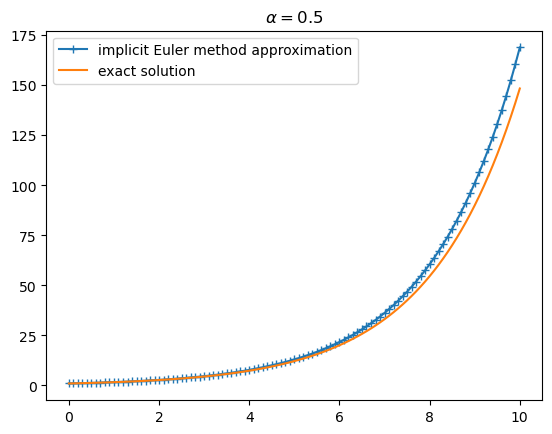

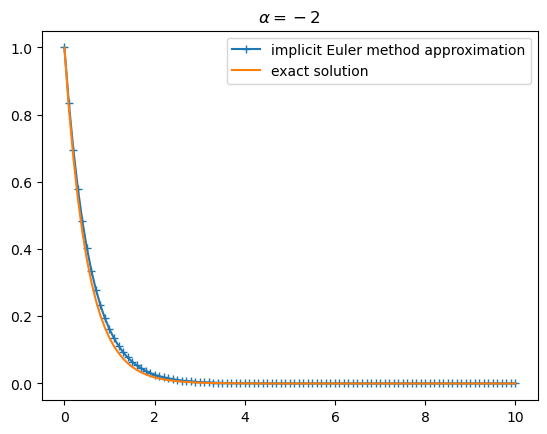

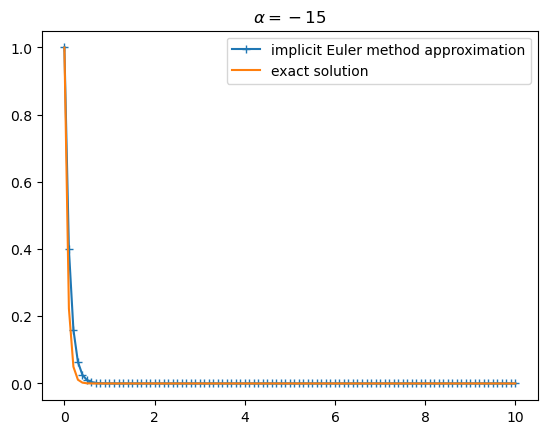

In [13]:
alpha=0.5
t,u_IE=implicit_euler(f,0.,T,u0,N)
plt.plot(t,u_IE,'-+',label='implicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=0.5$')
plt.legend()

alpha=-2.
t,u_IE=implicit_euler(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_IE,'-+',label='implicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-2$')
plt.legend()

alpha=-15
t,u_IE=implicit_euler(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_IE,'-+',label='implicit Euler method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-15$')
plt.legend()

**Answer.** There are no such instablities with the implicit Euler method.

**c. The trapezoidal rule.** The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule_(differential_equations)) is an implicit one-step method, which can be considered as both a [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) and a [linear multistep method](https://en.wikipedia.org/wiki/Linear_multistep_method) of Adams-Moulton type, defined by the following recursion relation
$$
u^{(n+1)}_{\text{TR}}=u^{(n)}_{\text{TR}}+\frac{h}{2}\,\left(f(nh,u^{(n)}_{\text{TR}})+f((n+1)h,u^{(n+1)}_{\text{TR}})\right),
$$
in which $h$ is the fixed spacing.

**Preliminary question.** Show that the trapezoidal rule method is a second-order method.

**Answer.** Denoting by $\tilde u^{(n+1)}$ the value of the right-hand side obtained by inserting a smooth solution $u$ of the ordinary differential equation equation into the above scheme, one gets, using a Taylor expansion,
$$
\tilde u^{(n+1)}=u(t_n)+h\,f(t_n,u(t_n))+\frac{h^2}{2}\left(\frac{\partial f}{\partial t}(t_n,u(t_n))+f(t_n,u(t_n))\frac{\partial f}{\partial x}(t_n,u(t_n))\right)+O(h^3)
$$
which matches the Taylor expansion of $u(t_{n+1})$ up to order $2$.

In [14]:
def trapezoidal(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=np.linspace(ti,tf,N+1),[]
    u.append(u0)
    for n in range(N):
        u.append(fsolve(lambda x:x-u[n]-0.5*h*(f(t[n],u[n])+f(t[n]+h,x)),u[n],xtol=1e-8))
    return t,u

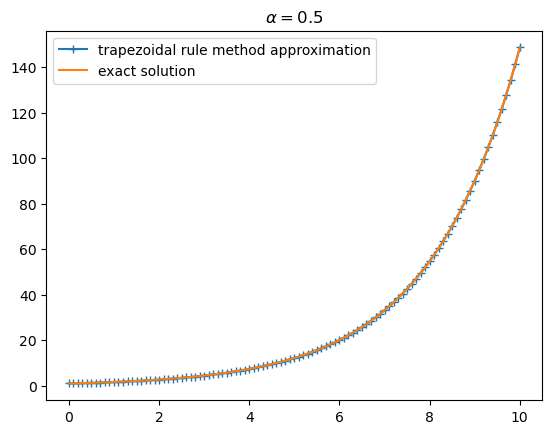

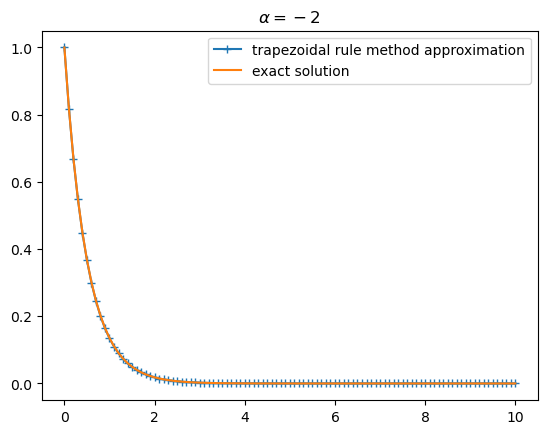

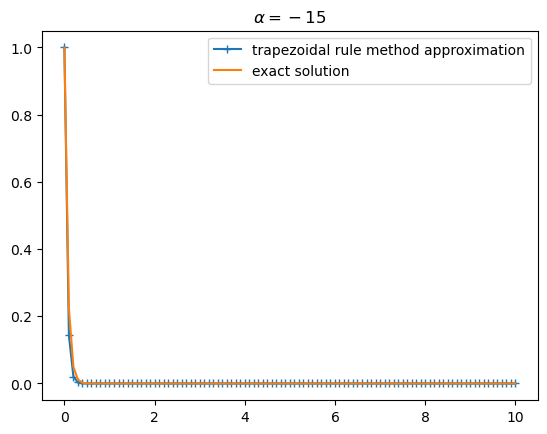

In [15]:
alpha=0.5
t,u_TR=trapezoidal(f,0.,T,u0,N)
plt.plot(t,u_TR,'-+',label='trapezoidal rule method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=0.5$')
plt.legend()

alpha=-2.
t,u_TR=trapezoidal(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_TR,'-+',label='trapezoidal rule method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-2$')
plt.legend()

alpha=-15
t,u_TR=trapezoidal(f,0.,T,u0,N)
plt.figure()
plt.plot(t,u_TR,'-+',label='trapezoidal rule method approximation')
plt.plot(t,np.exp(alpha*t),label='exact solution')
plt.title(r'$\alpha=-15$')
plt.legend()

**Answer.** It is observed that the trapezoidal rule method is stable and more accurate than the implicit Euler method.

## Exercise 3. A second-order differential equation: the harmonic oscillator.

We consider the following Cauchy problem:
$$\begin{cases}
u''(t)+\omega^2u(t)=0,\ t>0,\\
u(0)=1,\\
u'(0)=0,
\end{cases}
$$
to be solved up to time $T$, where $u$ takes its values in $\mathbb{R}$, $\omega$ being a given real number.

**Question.** Introducing the function $v=\frac{u'}{\omega}$, show that this system is equivalent to a complex exponential system such as defined in the previous exercise. Express $\alpha$ in terms of $\omega$.

**Answer.** The above second-order differential equation can be rewritten as a first-order differential system, leading to the following problem
$$
\begin{cases}
u'(t)=-\omega\,v(t)=0,\ t>0,\\
v'(t)=\omega\,u(t),\ t>0,\\
u(0)=1,\\
v(0)=0.
\end{cases}
$$
One thus has

$$
\alpha=\begin{pmatrix}0&-\omega\\\omega&0\end{pmatrix}.
$$

**Question.** Solve numerically the resulting system for $\omega = 1$ using the explicit Euler method, the implicit Euler method, and the trapezoidal rule method.

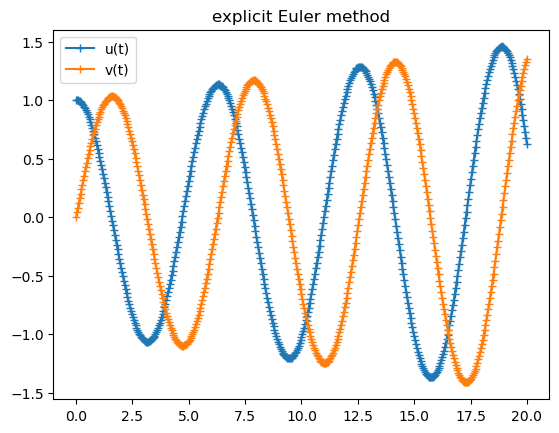

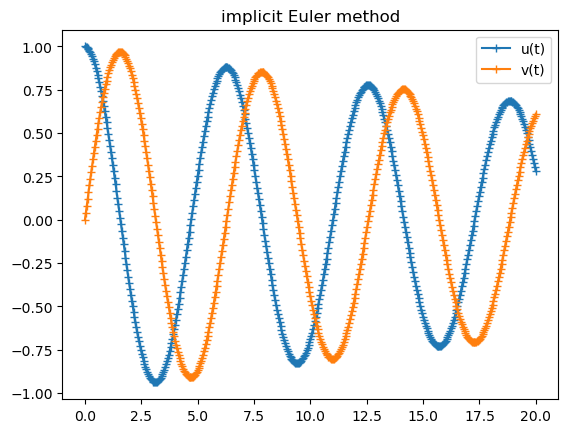

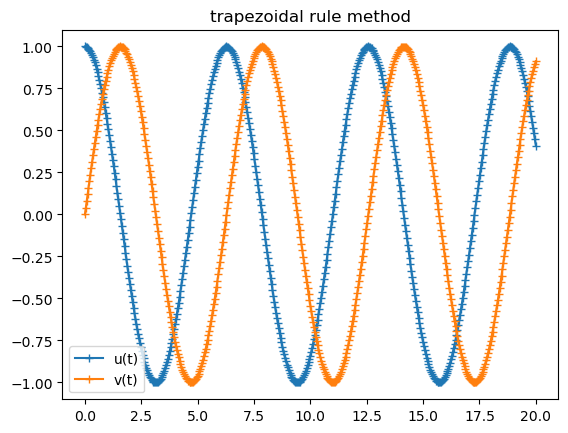

In [16]:
omega=1.
alpha=omega*np.array([[0.,-1.],[1.,0.]])

def f(t,x): return alpha.dot(x)

T=20.
N=500

u0=np.array([1.,0.])

t,u_EE=explicit_euler(f,0.,T,u0,N)
u_EE=np.array(u_EE)
plt.title("explicit Euler method")
plt.plot(t,u_EE[:,0],'-+',label='u(t)')
plt.plot(t,u_EE[:,1],'-+',label='v(t)')
plt.legend()

t,u_IE=implicit_euler(f,0.,T,u0,N)
u_IE=np.array(u_IE)
plt.figure()
plt.title("implicit Euler method")
plt.plot(t,u_IE[:,0],'-+',label='u(t)')
plt.plot(t,u_IE[:,1],'-+',label='v(t)')
plt.legend()

t,u_TR=trapezoidal(f,0.,T,u0,N)
u_TR=np.array(u_TR)
plt.figure()
plt.title("trapezoidal rule method")
plt.plot(t,u_TR[:,0],'-+',label='u(t)')
plt.plot(t,u_TR[:,1],'-+',label='v(t)')
plt.legend()

**Question.** Plot the respective [phase portraits](https://en.wikipedia.org/wiki/Phase_portrait) of the numerical approximations (that is, plot the approximations in the $(u,v)$-plane).

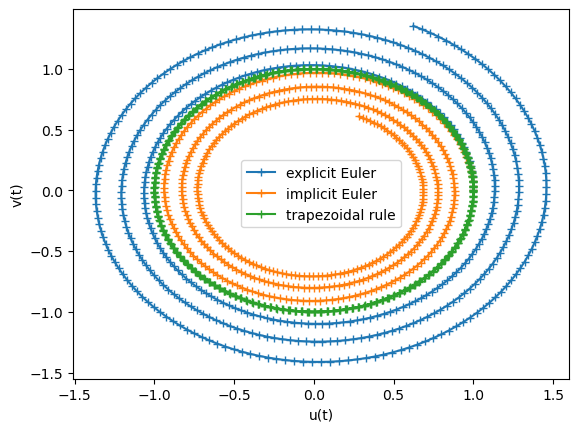

In [17]:
plt.plot(u_EE[:,0],u_EE[:,1],'-+',label='explicit Euler')
plt.plot(u_IE[:,0],u_IE[:,1],'-+',label='implicit Euler')
plt.plot(u_TR[:,0],u_TR[:,1],'-+',label='trapezoidal rule')
plt.xlabel("u(t)")
plt.ylabel("v(t)")
plt.legend()

**Question.** If one wants to enforce energy conservation in this system, which numerical method should be preferably used? Explain theoretically what is observed with the selected numerical method.

**Answer.** Using the ordinary differential equation defining the problem, one can easily see that the total energy of the system $E(t)=\frac{1}{2}(u'(t))^2+\frac{\omega^2}{2}(u(t))^2$ is conserved. Indeed, multiplying the equation by $u'(t)$, one gets
$$
\forall t\in(0,+\infty),\ u''(t)u'(t)-\omega^2u(t)u'(t)=\frac{\mathrm{d}\ }{\mathrm{d}t}\left(\frac{1}{2}(u'(t))^2+\frac{\omega^2}{2}(u(t))^2\right)=0.
$$
Looking at the last figure, it appears clearly that the trapezoidal rule method should be prefered, as it is the only one preserving the area inside the curve at each cycle. This can be shown theoretically.

On the one hand, for the explicit Euler method, one has
$$
\forall n\in\mathbb{N},\ \begin{pmatrix}u_{\text{EE}}^{(n+1)}\\v_{\text{EE}}^{(n+1)}\end{pmatrix}=\begin{pmatrix}1&-h\omega\\h\omega&1\end{pmatrix}\begin{pmatrix}u_{\text{EE}}^{(n)}\\v_{\text{EE}}^{(n)}\end{pmatrix},
$$
hence
$$
\forall n\in\mathbb{N},\ \left(u_{\text{EE}}^{(n+1)}\right)^2+\left(v_{\text{EE}}^{(n+1)}\right)^2=\left(1+(h\omega)^2\right)\left(\left(u_{\text{EE}}^{(n)}\right)^2+\left(v_{\text{EE}}^{(n)}\right)^2\right).
$$
On the other hand, for the implicit Euler method, one has
$$
\forall n\in\mathbb{N},\ \begin{pmatrix}1&h\omega\\-h\omega&1\end{pmatrix}\begin{pmatrix}u_{\text{IE}}^{(n+1)}\\v_{\text{IE}}^{(n+1)}\end{pmatrix}=\begin{pmatrix}u_{\text{IE}}^{(n)}\\v_{\text{IE}}^{(n)}\end{pmatrix},
$$
hence
$$
\forall n\in\mathbb{N},\ \left(u_{\text{IE}}^{(n+1)}\right)^2+\left(v_{\text{IE}}^{(n+1)}\right)^2=\frac{1}{1+(h\omega)^2}\left(\left(u_{\text{IE}}^{(n)}\right)^2+\left(v_{\text{IE}}^{(n)}\right)^2\right).
$$
Finally, for the trapezoidal rule method, one has
$$
\forall n\in\mathbb{N},\ \begin{pmatrix}1&\frac{1}{2}h\omega\\-\frac{1}{2}h\omega&1\end{pmatrix}\begin{pmatrix}u_{\text{TR}}^{(n+1)}\\v_{\text{TR}}^{(n+1)}\end{pmatrix}=\begin{pmatrix}1&-\frac{1}{2}h\omega\\\frac{1}{2}h\omega&1\end{pmatrix}\begin{pmatrix}u_{\text{TR}}^{(n)}\\v_{\text{TR}}^{(n)}\end{pmatrix},
$$
hence
$$
\forall n\in\mathbb{N},\ \left(u_{\text{TR}}^{(n+1)}\right)^2+\left(v_{\text{TR}}^{(n+1)}\right)^2=\left(u_{\text{TR}}^{(n)}\right)^2+\left(v_{\text{TR}}^{(n)}\right)^2.
$$

## Exercise 4. Stiff equation and absolute stability.
We want to approximate numerically the solution to the Cauchy problem
$$
\begin{cases}
u'(t)=-50\,\left(u(t)-\sin(t)\right)+\cos(t),& t>0,\\
u(0)=1,
\end{cases}
$$
on the interval $[0,2]$. 

**Question.** Use the explicit Euler method to solve the problem with a discretisation step of constant length, successively chosen

- strictly greater than 0.04, 
- between 0.02 and 0.04,
- strictly less than 0.02.

What is observed and what explanation can be given?

Text(0.5, 1.0, 'h=0.01')

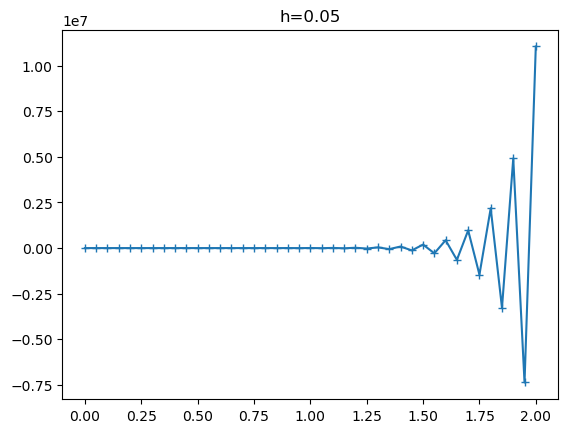

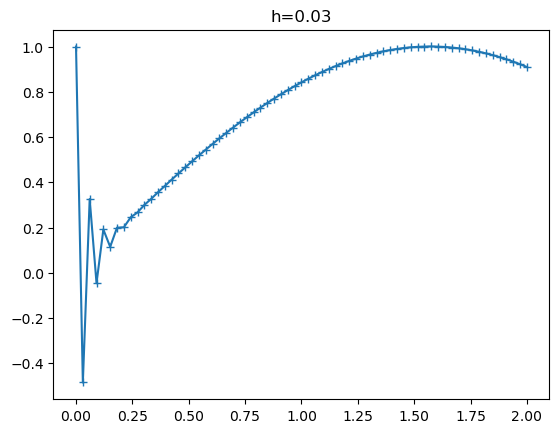

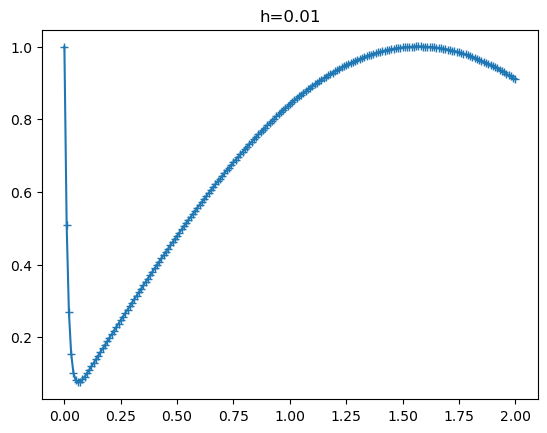

In [18]:
def f(t,u): return -50*(u-np.sin(t))+np.cos(t)

u0=np.array([1.])

t,u=explicit_euler(f,0,2.,u0,int(2/0.05))
plt.plot(t,u,'-+')
plt.title("h=0.05")
plt.figure()
t,u=explicit_euler(f,0,2.,u0,int(2/0.03))
plt.plot(t,u,'-+')
plt.title("h=0.03")
plt.figure()
t,u=explicit_euler(f,0,2.,u0,int(2/0.01))
plt.plot(t,u,'-+')
plt.title("h=0.01")

**Answer.** For a step length of $h=0.05$, we observe an important numerical instability phenomenon in the calculated approximation. With a step length of $h=0.03$, the phenomenon is less pronounced, but clearly visible at the first moments of the simulation. Finally, with a step length of $h=0.01$, the obtained approximation does not present any numerical instability.

The above differential equation is an example of a [stiff equation](http://en.wikipedia.org/wiki/Stiff_equation), whose solution can be written as the sum of a fast and a slow component.

**Question.** Determine the closed form of the solution and identify its respective fast and slow components.

**Answer.** One finds $u(t)=e^{-50t}+\sin(t)$, the fast component being $t\mapsto e^{-50t}$ and the slow one $t\mapsto \sin(t)$.

From a numerical point of view, one calls *stiff* any system of ordinary differential equations for which an explicit numerical solution method presents problems of numerical instability, unless the discretisation step length is extremely small (or, to be more precise, much smaller than would be required in principle for the accuracy required when using a step adaptation mechanism). The simulations previously performed indicate that we are here faced by such an equation.

**Question.** Perform the previous calculations using this time the implicit Euler method. Conclude.

Text(0.5, 1.0, 'h=0.01')

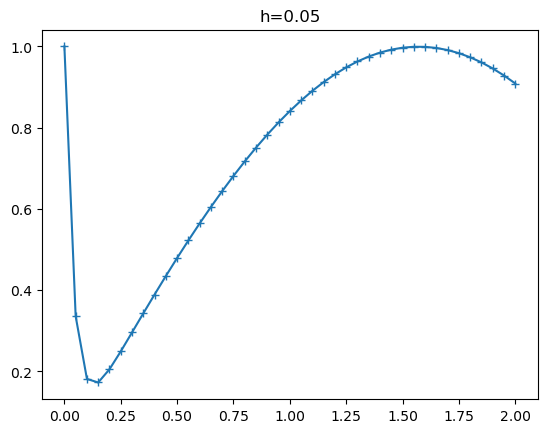

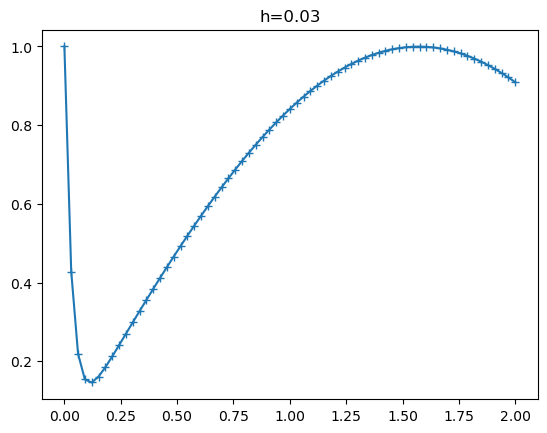

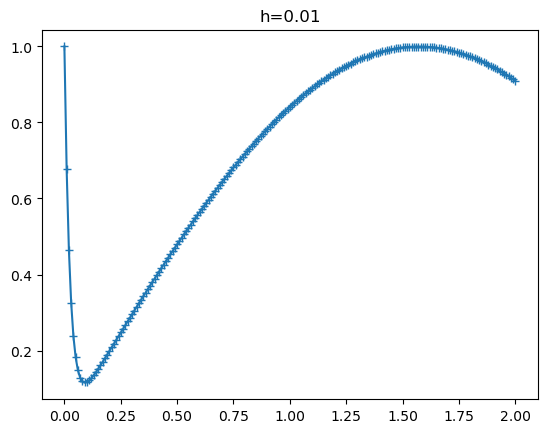

In [19]:
t,u=implicit_euler(f,0,2,u0,int(2/0.05))
plt.plot(t,u,'-+')
plt.title("h=0.05")
plt.figure()
t,u=implicit_euler(f,0,2,u0,int(2/0.03))
plt.plot(t,u,'-+')
plt.title("h=0.03")
plt.figure()
t,u=implicit_euler(f,0,2,u0,int(2/0.01))
plt.plot(t,u,'-+')
plt.title("h=0.01")

**Answer.** The implicit Euler method has an unbounded absolute stability domain, which contains the set of complex numbers whose real part is negative. It is said to be [A-stable](http://en.wikipedia.org/wiki/Stiff_equation#A-stability). An A-stable method is not subject to instability problems when used to solve a stiff equation, as can be seen here.

## Exercise 5. A chaotic dynamical system: the Lorenz system.

We are interested in [the Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system), first studied by the mathematician and meteorologist Edward Lorenz to model the atmospheric convection. It is defined as the following system of differential equations:
$$
\begin{cases}
x'(t)= \sigma(y(t) - x(t))\\
y'(t)= x(t)(\rho - z(t)) - y(t)\\
z'(t)= x(t)y(t) - \beta z(t)
\end{cases},\ t>0,
$$
completed by initial conditions, where $x, y, z : \mathbb{R} \rightarrow \mathbb{R}$ and the real numbers $\sigma$, $\rho$ and $\beta$ are fixed numerical parameters. In his experiments, Lorenz used the following values for these parameters: $\rho=28$, $\sigma=10$ and $\beta=\frac{8}{3}$.

In [20]:
rho = 28.
sigma = 10.
beta = 8./3.

We want to numerically solve the resulting system using a two-stage [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods), with Butcher's tableau
$$
\begin{array}{c|cc}
0&&\\
1&1&\\
\hline
&\frac{1}{2}&\frac{1}{2}
\end{array},
$$
called [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method).

**Question.** Show theoretically that Heun's method is a second-order method.

**Answer.** Consider the general case of an explicit two-stage Runge-Kutta method. Denoting by $\tilde u^{(n+1)}$ the value of the right-hand side obtained by inserting a smooth solution $u$ of the ordinary differential equation equation into the scheme of the method, one gets, using Taylor expansions,
$$
\tilde u^{(n+1)}=u(t_n)+h\left(b_1+b_2\right)\,f(t_n,u(t_n))+{h}^2\left(b_2c_2\right)\left(\frac{\partial f}{\partial t}(t_n,u(t_n))+f(t_n,u(t_n))\frac{\partial f}{\partial x}(t_n,u(t_n))\right)+O(h^3),
$$
which matches the Taylor expansion of $u(t_{n+1})$ up to order $2$ under the condition that $b_1+b_2=1$ and $b_2c_2=\frac{1}{2}$. The coefficients $b_1=\frac{1}{2}$, $b_2=\frac{1}{2}$ and $c_2=1$ of Heun's method clearly satisfy these two conditions.

**Question.** On the model of the previous functions, write an independent function named `rk2` implementing Heun's method.

In [21]:
def rk2(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=np.linspace(ti,tf,N+1),[]
    u.append(u0)
    for n in range(N):
        k1=f(t[n],u[n])
        k2=f(t[n]+h,u[n]+h*k1)
        u.append(u[n]+0.5*h*(k1+k2))
    return t,u

**Question.** Solve numerically the Lorenz system on the interval $[0,T]$ using Heun's method with the following initial values: $x (0) = y (0) = z (0) = 1$. We will use at least $T = 100$ and $N = 10000$.

In [22]:
T,N=100.,10000

def f(t,u):
    return np.array([sigma*(u[1]-u[0]),u[0]*(rho-u[2])-u[1],u[0]*u[1]-beta*u[2]])

u0=np.ones(3)
t,u=rk2(f,0,T,u0,N)

**Question.** Plot the solution in the 3D-space $(x,y,z)$. The ``mplot3d`` toolkit can be used for generating 3D plots (see a [tutorial](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html)).

Text(0.5, 0, '$z$')

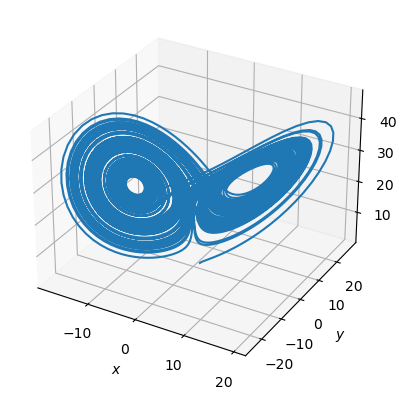

In [23]:
from mpl_toolkits.mplot3d import Axes3D
u=np.array(u)
ax=plt.figure().add_subplot(projection='3d')
ax.plot3D(u[:,0],u[:,1],u[:,2])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

This figure is characteristic of the *Lorenz attractor*. For some specific values of its parameters, as those chosen here, the system is chaotic: this means that solutions are highly senstive to initial conditions (small changes in the initial conditions produce large changes in the solutions).

**Question.** For the same values of the parameters, slightly change the initial values and observe the chaotic behaviour of the solution.

Text(0, 0.5, '$x(t)-x_{\\mathrm{bis}}(t)$')

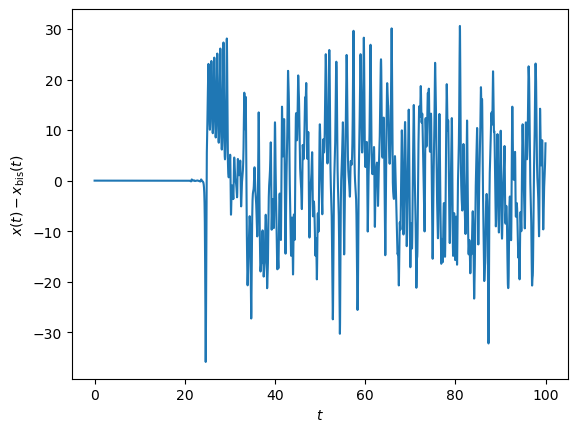

In [24]:
# small peturbation of the initial values previously used
u0=u0+np.array([0.,0.,1e-6])

t,ubis=rk2(f,0,T,u0,N)
ubis=np.array(ubis)
diff=u-ubis

plt.figure()
plt.plot(t,diff[:,0])
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)-x_{\mathrm{bis}}(t)$')

**Answer.** For the second computation, the initial value is slightly perturbed in the $z$ component. Plotting the difference in the $x$ component, one observes that the solutions are nearly identical at first, but, after some time, the difference between the two solution is about the same magnitude as the solutions themselves. Note that rounding errors also constitute perturbations and that the same behaviour could be observed for two computations with the same initial conditions but different time steps.

## Exercise 6. An Adams-Bashforth method.
When using one previous approximate value to compute the next one in a one-step method, the only way to improve the accuracy is to resort to a [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) with more stages. In [linear multistep methods](https://en.wikipedia.org/wiki/Linear_multistep_method), accuracy is improved by using more previous approximate values, that is using more than one step. We lok at an exemple of such a method in this exercise.

We consider the use of the (explicit) three-step Adams-Bashforth method, defined by
$$
u^{(n+1)}=u^{(n)}+\frac{h}{12}\left(23f(t_n,u^{(n)})-16f(t_{n-1},u^{(n-1)})+5f(t_{n-2},u^{(n−2)})\right),
$$
for the solution to the Cauchy problem
$$
\begin{cases}
u'(t)=f(t,u(t)),\ t>0,\\
u(0) = u_0.
\end{cases}
$$

**Question.** Using the integral form of the ordinary differential equation and considering steps of equal size $h$, show how the coefficients of the method are obtained using Lagrange polynomial interpolation of the right-hand side at the points $t_{n-2}$, $t_{n-1}$ and $t_n$.

**Answer.** The class of linear multistep methods that are called Adams methods are based on the integral form of the ordinary differential equation
$$
u(t_{n+1})=u(t_n)+\int_{t_n}^{t_{n+1}}f(t,u(t))\,\mathrm{d}t,
$$
the general idea being to approximate the integrand by polynomial interpolation at the times $t_n,t_{n-1},\dots,t_{n-q+1}$ if the method is explicit (that is, an Adams-Bashforth method), and $t_{n+1}$ as well if the method is implicit (that is, an Adams-Moulton method).
The interpolating polynomial whose graph passes through the points $(t_{n-2},f(t_{n-2},u^{(n-2)}))$, $(t_{n-1},f(t_{n-1},u^{(n-1)}))$ and $(t_n,f(t_n,u^{(n)}))$ is written, in Lagrange form, as follows
$$
\Pi_3(t)=f(t_{n-2},u^{(n-2)})\,\ell_{n-2}(t)+f(t_{n-1},u^{(n-1)})\,\ell_{n-1}(t)+f(t_n,u^{(n)})\,\ell_n(t),
$$
where the Lagrange polynomials are
$$
\ell_{n-2}(t)=\frac{(t-t_n)(t-t_{n-1})}{(t_{n-2}-t_n)(t_{n-2}-t_{n-1})}=\frac{(t-t_n)(t-t_{n-1})}{2h^2},
$$
$$
\ell_{n-1}(t)=\frac{(t-t_n)(t-t_{n-2})}{(t_{n-1}-t_n)(t_{n-1}-t_{n-2})}=-\frac{(t-t_n)(t-t_{n-2})}{h^2},
$$
$$
\ell_n(t)=\frac{(t-t_{n-1})(t-t_{n-2})}{(t_n-t_{n-1})(t_n-t_{n-2})}=\frac{(t-t_{n-1})(t-t_{n-2})}{2h^2}.
$$
Substituting this approximation in the integral form above leads to the scheme
$$
u^{(n+1)}=u^{(n)}+f(t_{n-2},u^{(n-2)})\int_{t_n}^{t_{n+1}}\ell_{n-2}(t)\,\mathrm{d}t+f(t_{n-1},u^{(n-1)})\int_{t_n}^{t_{n+1}}\ell_{n-1}(t)\,\mathrm{d}t+f(t_n,u^{(n)})\int_{t_n}^{t_{n+1}}\ell_n(t)\,\mathrm{d}t,
$$
and integrating using a change of variable, we obtain
$$
\int_{t_n}^{t_{n+1}}\ell_{n-2}(t)\,\mathrm{d}t=\frac{h}{2}\int_0^1\tau(\tau+1)\,\mathrm{d}\tau=\frac{5h}{12},
$$
$$
\int_{t_n}^{t_{n+1}}\ell_{n-1}(t)\,\mathrm{d}t=-h\int_0^1\tau(\tau+2)\,\mathrm{d}\tau=-\frac{4h}{3},
$$
$$
\int_{t_n}^{t_{n+1}}\ell_n(t)\,\mathrm{d}t=\frac{h}{2}\int_0^1(\tau+1)(\tau+2)\,\mathrm{d}\tau=\frac{23h}{12}.
$$

**Question.** What is the order of the method?

**Answer.** Denoting by $\tilde u^{(n+1)}$ the value of the right-hand side obtained by inserting a smooth solution of the ordinary differential equation equation into the the recurrence relation defining the method and doing Taylor expansions about the point $t_n$, one gets
$$
\tilde u^{(n+1)}=u(t_n)+h\left(\frac{23}{12}-\frac{4}{3}+\frac{5}{12}\right)u'(t_n)+h^2\left(\frac{4}{3}-\frac{5}{6}\right)u''(t_n)+h^3\left(-\frac{2}{3}+\frac{5}{6}\right)u'''(t_n)+O(h^4)=u(t_n)+h\,u'(t_n)+\frac{h^2}{2}\,u''(t_n)+\frac{h^3}{6}\,u'''(t_n)+O(h^4).
$$
This expression matches the Taylor expansion of $u(t_{n+1})$ up to order $3$. The method thus is of third order.

**Question.** Write, on the model of the previous functions, a function named `ab3` implementing the three-step Adams-Bashforth method. Explain how the method is effectively started from the single value $u_0$.

**Answer.** Three first values are needed to start using the recurrence relation defining the method but the initial value $u_0$ only provides one. As a consequence, a one-step method is needed to compute approximations to the two missing starting values. Here, the Heun method (seen to be of second order) is used, which is enough to recover the theoretical order of the method in practice. Note that using the less accurate explicit Euler method would lead to an effective decrease in order.

In [25]:
def ab3(f,ti,tf,u0,N):
    h=(tf-ti)/N
    t,u=rk2(f,ti,ti+2*h,u0,2)
    t=np.linspace(ti,tf,N+1)
    f2=f(t[0],u[0])
    f1=f(t[1],u[1])
    for n in range(2,N):
        f0=f(t[n],u[n])
        u.append(u[n]+h*(23*f0-16*f1+5*f2)/12)
        f2,f1=f1,f0
    return t,u

**Question.** Determine numerically the order of the method by solving a problem for which the solution is explicitely known.

**Answer.** Let us consider the problem
$$
\begin{cases}
u'(t)=\cos(t)e^{-2u(t)},\ 0<t\leq5,\\
u(0) = 1.
\end{cases}
$$
with solution $u(t)=\frac{1}{2}\ln(e^2+2\sin(t))$.

The effective order of convergence is 3.0862745193512087


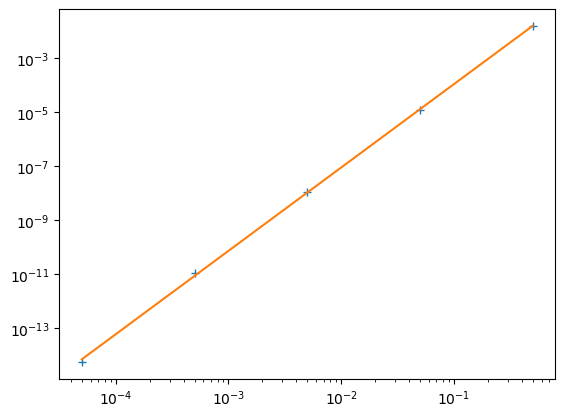

In [26]:
def f(t,u): return np.cos(t)*np.exp(-2*u)
u0=1.
uref,err,h=0.5*np.log(np.exp(2)+2*np.sin(5)),[],[]
for i in range(5):
    N=10**(i+1)
    h.append(5/N)
    t,u=ab3(f,0.,5.,u0,N)
    err.append(np.linalg.norm(uref-u[-1]))
slope=np.polyfit(np.log(h),np.log(err),1)
plt.loglog(h,err,'+',h,np.exp(slope[1])*(h**(slope[0])))
print("The effective order of convergence is",slope[0])